In [40]:
import pandas as pd

# Importing data
dayparts_2010_url = 'https://raw.githubusercontent.com/juanpaul96/holcim_DAE_test/main/dayparts_2010_silver.csv'
dayparts_2011_url = 'https://raw.githubusercontent.com/juanpaul96/holcim_DAE_test/main/dayparts_2011_silver.csv'
demographics_url = 'https://raw.githubusercontent.com/juanpaul96/holcim_DAE_test/main/demographics_silver.csv'
product_sales_url = 'https://raw.githubusercontent.com/juanpaul96/holcim_DAE_test/main/products_silver.csv'

dayparts_2010_silver= pd.read_csv(dayparts_2010_url)
dayparts_2011_silver= pd.read_csv(dayparts_2011_url)
demographics_silver = pd.read_csv(demographics_url)
product_silver = pd.read_csv(product_sales_url)


/tmp/ipykernel_3628/3688505355.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_day_2010['reporting_day'] = pd.to_datetime(total_day_2010['reporting_day'])


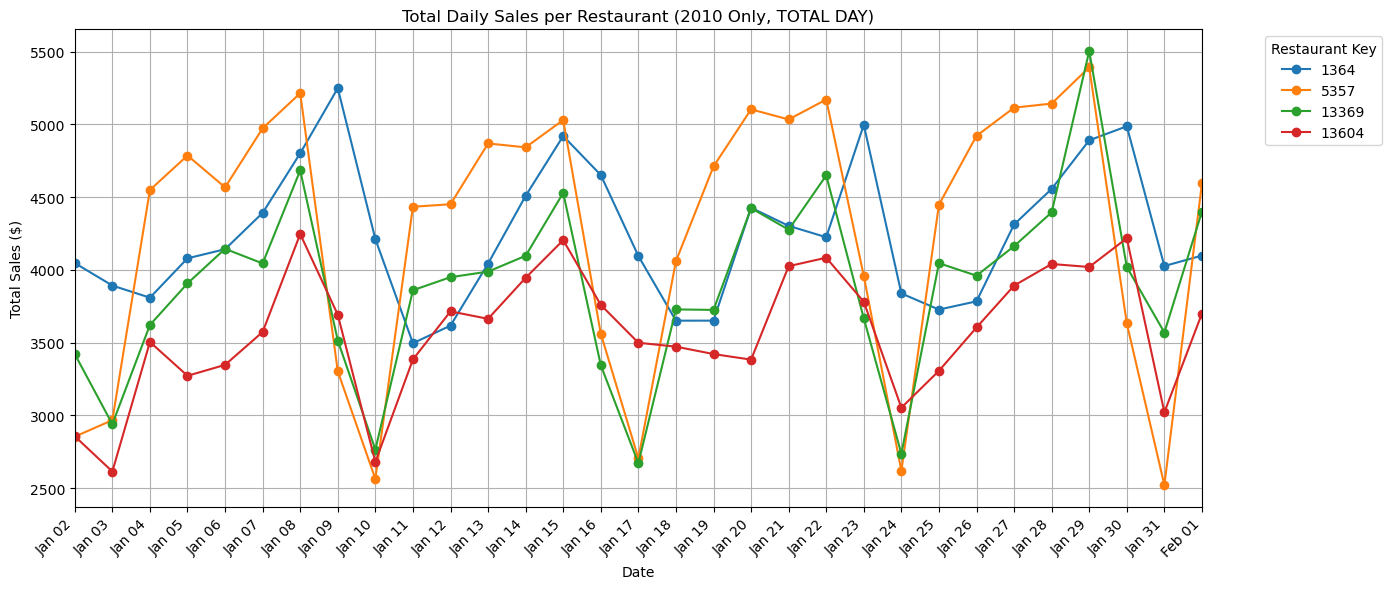

In [72]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Filter to include only rows with Daypart_Name = 'TOTAL DAY'
total_day_2010 = dayparts_2010[dayparts_2010['daypart_name'].str.upper() == 'TOTAL DAY']

# Convert reporting_day to datetime if it's not already
total_day_2010['reporting_day'] = pd.to_datetime(total_day_2010['reporting_day'])

#Pivot for visualization
sales_pivot = total_day_2010.pivot(
    index='reporting_day',
    columns='rest_key',
    values='daypart_sales'
)

# Plotting
fig, ax = plt.subplots(figsize=(14, 6))
sales_pivot.plot(ax=ax, marker='o')

# Format the x-axis with dates
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Rotate date labels for readability
plt.xticks(rotation=45, ha='right')

ax.set_title('Total Daily Sales per Restaurant (2010 Only, TOTAL DAY)')
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales ($)')
ax.grid(True)
ax.legend(title='Restaurant Key', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3628/3477518947.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_day_2011['reporting_day'] = pd.to_datetime(total_day_2011['reporting_day'])


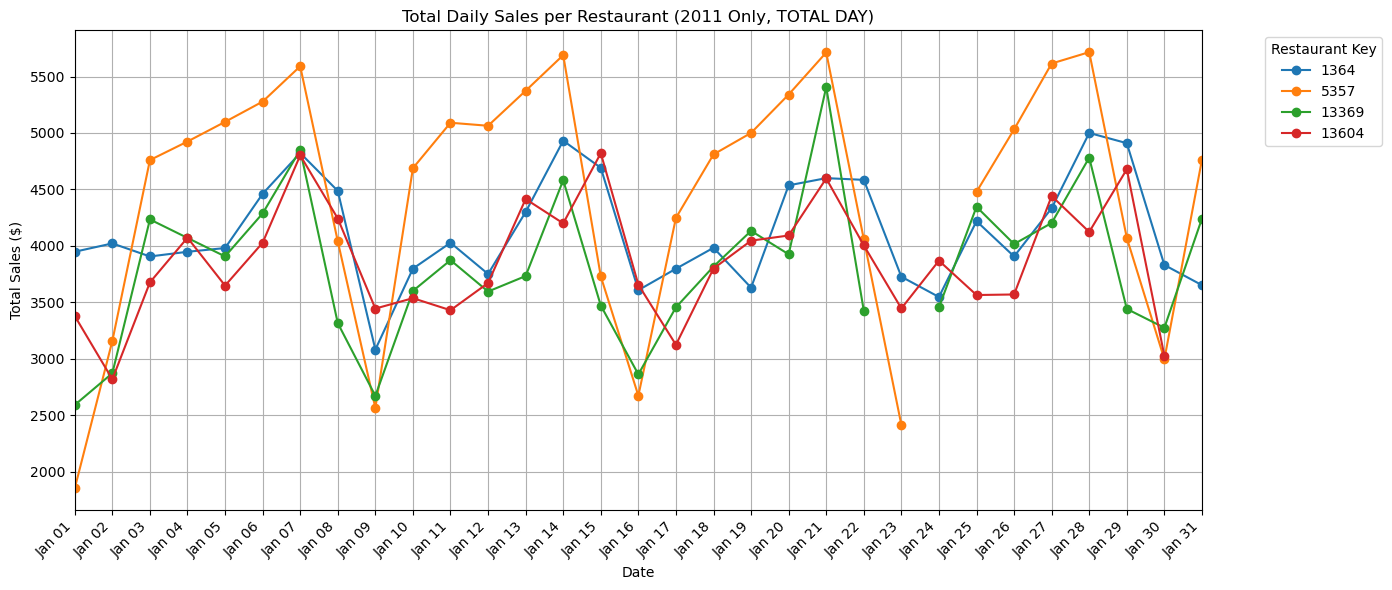

In [45]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

dayparts_2011 = dayparts_2011_silver.copy()

# Filter to include only rows with Daypart_Name = 'TOTAL DAY'
total_day_2011 = dayparts_2011[dayparts_2011['daypart_name'].str.upper() == 'TOTAL DAY']

# Convert reporting_day to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(total_day_2011['reporting_day']):
    total_day_2011['reporting_day'] = pd.to_datetime(total_day_2011['reporting_day'])

# Pivot for visualization
sales_pivot = total_day_2011.pivot(
    index='reporting_day',
    columns='rest_key',
    values='daypart_sales'
)

# Plotting
fig, ax = plt.subplots(figsize=(14, 6))
sales_pivot.plot(ax=ax, marker='o')

# Force every date in the index to be a tick
ax.set_xticks(sales_pivot.index)

# Label them, rotated for readability
ax.set_xticklabels(
    [d.strftime('%Y-%m-%d') for d in sales_pivot.index],  # Convert datetime to string format
    rotation=45,
    ha='right'
)

# DateFormatter:
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

ax.set_title('Total Daily Sales per Restaurant (2011 Only, TOTAL DAY)')
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales ($)')
ax.grid(True)
ax.legend(title='Restaurant Key', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#looking into the graphs I can visually check that in 2011 we have missing data.

In [73]:
from itertools import product

# Filter to include only rows with Daypart_Name = 'TOTAL DAY' for 2011
total_day_2011 = dayparts_2011[dayparts_2011['daypart_name'].str.upper() == 'TOTAL DAY']

# Create a complete set of all restaurant-date combinations in 2011
unique_dates_2011 = dayparts_2011['reporting_day'].dropna().unique()
unique_restaurants_2011 = dayparts_2011['rest_key'].unique()
full_index_2011 = pd.MultiIndex.from_tuples(
    product(unique_dates_2011, unique_restaurants_2011),
    names=['reporting_day', 'rest_key']
)

# Set of available TOTAL DAY records in 2011
total_day_index_2011 = pd.MultiIndex.from_frame(
    total_day_2011[['reporting_day', 'rest_key']]
)

# Identify missing combinations
missing_total_day_2011 = full_index_2011.difference(total_day_index_2011)
missing_df_2011 = pd.DataFrame(missing_total_day_2011.tolist(), columns=['reporting_day', 'rest_key'])

#missing Total day:
missing_df_2011

,reporting_day,rest_key
0,2011-01-23,13369
1,2011-01-24,5357
2,2011-01-31,13604


In [78]:
from itertools import product
from datetime import timedelta

dayparts_2011['reporting_day'] = pd.to_datetime(total_day_2011['reporting_day'])


# Ensure consistent formatting
dayparts_2011['daypart_name'] = dayparts_2011['daypart_name'].str.upper()
dayparts_2011['Weekday'] = dayparts_2011['reporting_day'].dt.day_name()

# Identify expected combinations
unique_dates = dayparts_2011['reporting_day'].dropna().unique()
unique_restaurants = dayparts_2011['rest_key'].unique()
unique_dayparts = dayparts_2011['daypart_name'].unique()
full_index = pd.MultiIndex.from_tuples(
    product(unique_dates, unique_restaurants, unique_dayparts),
    names=['reporting_day', 'rest_key', 'daypart_name']
)

# Identify which combinations are missing
actual_index = pd.MultiIndex.from_frame(dayparts_2011[['reporting_day', 'rest_key', 'daypart_name']])
missing_index = full_index.difference(actual_index)
missing_df = pd.DataFrame(missing_index.tolist(), columns=['reporting_day', 'rest_key', 'daypart_name'])
missing_df['Weekday'] = missing_df['reporting_day'].dt.day_name()

# Estimate missing values using average of same weekday over prior 4 weeks
def estimate_from_prior_weeks(row):
    date, rest, dp_name = row['reporting_day'], row['rest_key'], row['daypart_name']
    prior_dates = [(date - timedelta(weeks=i)) for i in range(1, 5)]
    mask = (
        (dayparts_2011['rest_key'] == rest) &
        (dayparts_2011['daypart_name'] == dp_name) &
        (dayparts_2011['reporting_day'].isin(prior_dates))
    )
    recent = dayparts_2011[mask]
    if not recent.empty:
        return pd.Series([
            recent['daypart_sales'].mean(),
            recent['daypart_transaction_qty'].mean()
        ])
    return pd.Series([None, None])

missing_df[['daypart_sales', 'daypart_transaction_qty']] = missing_df.apply(estimate_from_prior_weeks, axis=1)
missing_df = missing_df.dropna(subset=['daypart_sales', 'daypart_transaction_qty'])

# Format estimated rows to match original schema
missing_df['daypart_description'] = 'Estimated from prior weeks'
missing_df['daypart_sales'] = missing_df['daypart_sales'].round(2)
missing_df['daypart_transaction_qty'] = missing_df['daypart_transaction_qty'].round(0).astype(int)
missing_df['rest_coop'] = None  # Placeholder
estimated_2011_avg = missing_df[dayparts_2011.columns]

# Step 5: Join estimated rows back to the 2011 dataset
dayparts_2011_filled = pd.concat([dayparts_2011, estimated_2011_avg], ignore_index=True)


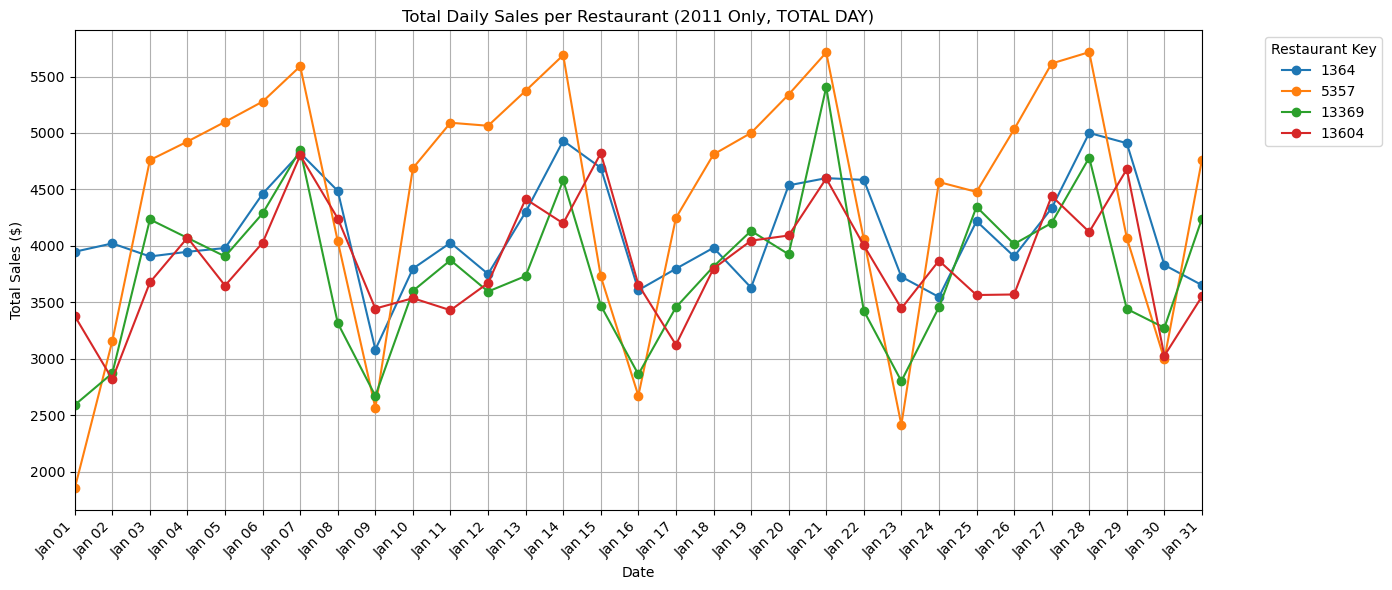

In [79]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter to include only rows with Daypart_Name = 'TOTAL DAY'
total_day_2011 = dayparts_2011_filled[
    dayparts_2011_filled['daypart_name'].str.upper() == 'TOTAL DAY'
]

# Pivot for visualization
sales_pivot = total_day_2011.pivot(
    index='reporting_day',
    columns='rest_key',
    values='daypart_sales'
)

# Plotting
fig, ax = plt.subplots(figsize=(14, 6))
sales_pivot.plot(ax=ax, marker='o')

# Force every date in the index to be a tick
ax.set_xticks(sales_pivot.index)

# Label them, rotated for readability
ax.set_xticklabels(
    sales_pivot.index.strftime('%Y-%m-%d'),
    rotation=45,
    ha='right'
)

# DateFormatter:
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

ax.set_title('Total Daily Sales per Restaurant (2011 Only, TOTAL DAY)')
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales ($)')
ax.grid(True)
ax.legend(title='Restaurant Key', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
